In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
credit_card_dataset = pd.read_csv('creditcard.csv')
print(credit_card_dataset.head(5))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
credit_card_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
credit_card_dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
credit_card_dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [15]:
no_fraud = credit_card_dataset['Class'].value_counts()[0] * 100 / len(credit_card_dataset)
fraud = credit_card_dataset['Class'].value_counts()[1] * 100 / len(credit_card_dataset)

print(f'No Fraud is {round(no_fraud, 2)}% of the whole dataset')
print(f'Fraud is {round(fraud, 2)}% of the whole dataset')

No Fraud is 99.83% of the whole dataset
Fraud is 0.17% of the whole dataset


Text(0.5, 1.0, 'Class Distribution \n (0 : No Fraud || 1 : Fraud)')

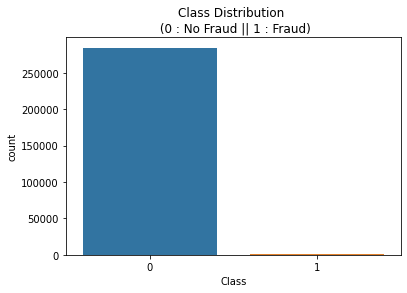

In [26]:
sns.countplot('Class', data=credit_card_dataset)
plt.title('Class Distribution \n (0 : No Fraud || 1 : Fraud)')

(0.0, 172792.0)

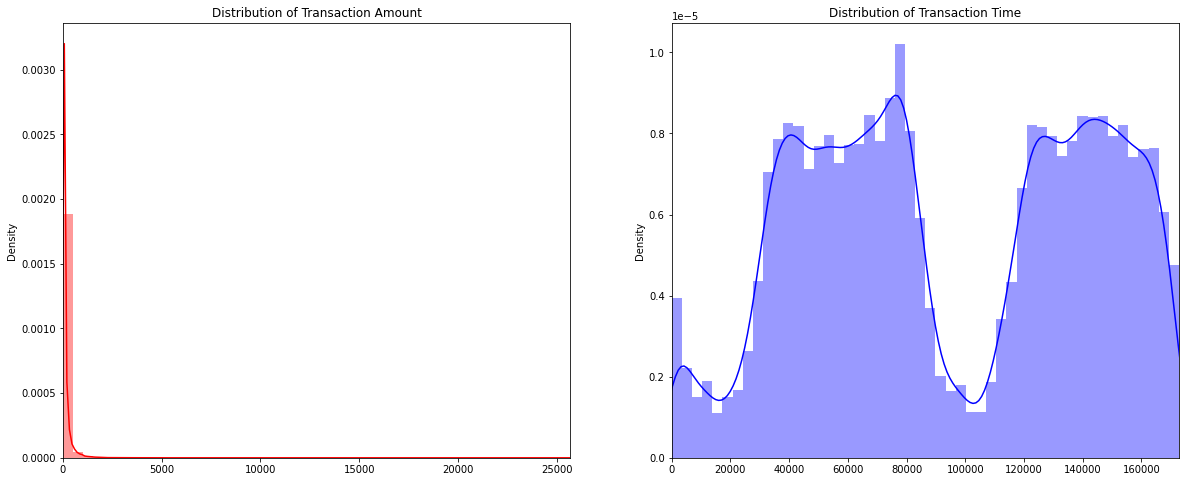

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

amount = credit_card_dataset['Amount'].values
time = credit_card_dataset['Time'].values

sns.distplot(amount, ax=ax[0], color='red')
ax[0].set_title('Distribution of Transaction Amount')
ax[0].set_xlim([min(amount), max(amount)])

sns.distplot(time, ax=ax[1], color='blue')
ax[1].set_title('Distribution of Transaction Time')
ax[1].set_xlim([min(time), max(time)])

In [30]:
scalar = StandardScaler()

amount = credit_card_dataset['Amount'].values.reshape(-1, 1)
time = credit_card_dataset['Time'].values.reshape(-1, 1)

credit_card_dataset['Scaled Amount'] = scalar.fit_transform(amount)
credit_card_dataset['Scaled Time'] = scalar.fit_transform(time)

credit_card_dataset.drop(['Amount', 'Time'], axis=1, inplace=True)

credit_card_dataset.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled Amount,Scaled Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [53]:
temp_dataset = credit_card_dataset.sample(frac=1)

fraud = temp_dataset.loc[temp_dataset['Class'] == 1]
no_fraud = temp_dataset.loc[temp_dataset['Class'] == 0][:len(fraud)]

distributed_dataset = pd.concat([fraud, no_fraud])

distributed_dataset = distributed_dataset.sample(frac=1, random_state=42)
distributed_dataset.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled Amount,Scaled Time
136799,-2.064847,1.642390,0.127573,-0.066136,-0.373675,0.131951,-0.297421,1.253629,-0.519375,-1.046811,...,-0.689392,-0.355376,-0.957180,0.664018,0.382345,-0.354604,-0.133705,0,-0.226410,-0.272529
203324,-0.079653,3.222010,-3.724201,6.037345,0.583395,-0.691346,-1.799885,-2.627781,-4.001338,-2.271526,...,1.138556,-0.350753,-0.287467,0.808889,0.823962,0.668497,0.595610,1,-0.349231,0.841309
57469,1.124891,0.128888,0.910005,1.392762,-0.648094,-0.392989,-0.160586,0.059051,0.535170,-0.196730,...,-0.425182,0.148693,0.582406,0.337621,-0.546089,0.055023,0.027938,0,-0.349231,-0.987445
15506,-21.885434,12.930505,-24.098872,6.203314,-16.466099,-4.459842,-16.519836,14.535565,-3.897022,-8.650758,...,-1.579055,-0.951043,0.134565,1.507110,-0.222671,1.527655,0.453699,1,0.046539,-1.430146
42528,-4.595617,5.083690,-7.581015,7.546033,-6.949165,-1.729185,-8.190192,2.714670,-7.083169,-11.141278,...,0.566844,0.033744,0.591783,0.334229,0.386801,2.163898,0.983104,1,1.006560,-1.130302


Text(0.5, 1.0, 'Equal Class Distribution \n (0 : No Fraud || 1 : Fraud)')

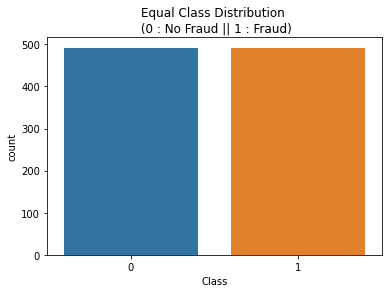

In [39]:
sns.countplot('Class', data=distributed_dataset)
plt.title('Equal Class Distribution \n (0 : No Fraud || 1 : Fraud)')

Text(0.5, 1.0, 'Balnced Correlation Matrix')

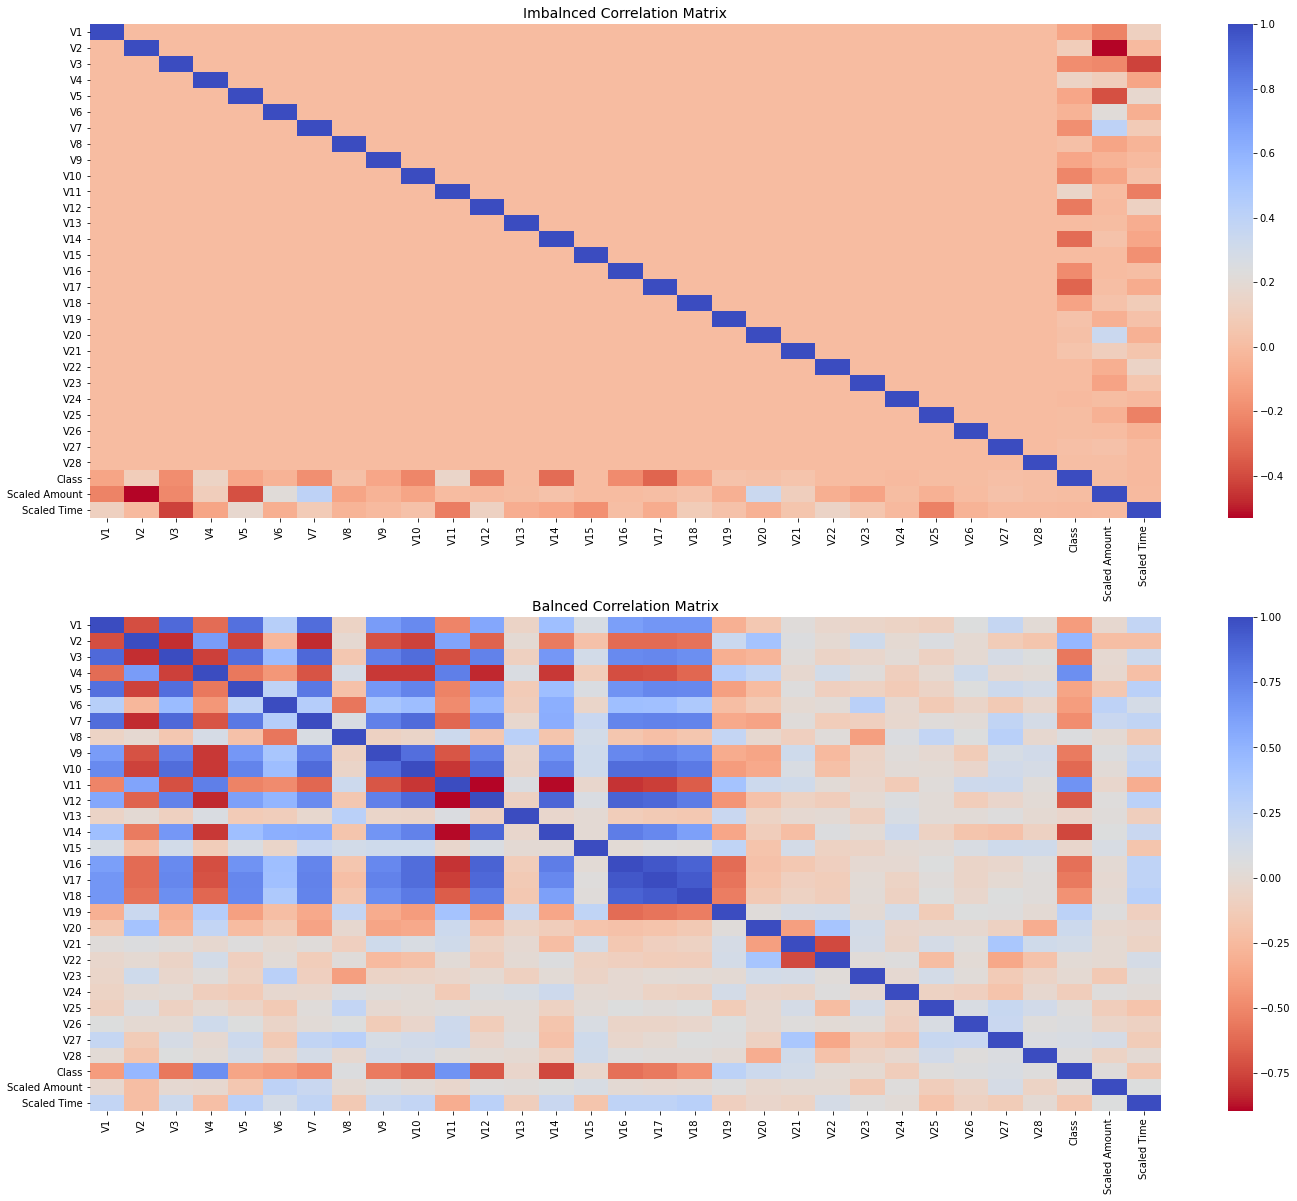

In [40]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 20))

imbalanced_corr = credit_card_dataset.corr()
sns.heatmap(imbalanced_corr, cmap='coolwarm_r', ax=ax1)
ax1.set_title('Imbalnced Correlation Matrix', fontsize=14)

balanced_corr = distributed_dataset.corr()
sns.heatmap(balanced_corr, cmap='coolwarm_r', ax=ax2)
ax2.set_title('Balnced Correlation Matrix', fontsize=14)

Text(0.5, 1.0, 'V16 vs Class')

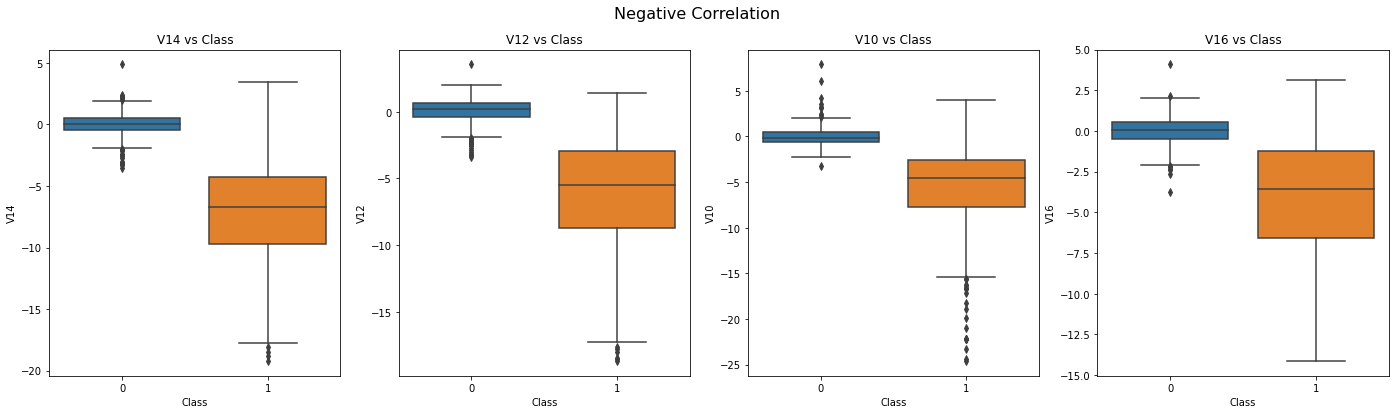

In [49]:
f, axes = plt.subplots(ncols = 4, figsize=(24, 6))

f.suptitle('Negative Correlation', fontsize=16)

sns.boxplot(x='Class', y='V14', data=distributed_dataset, ax=axes[0])
axes[0].set_title('V14 vs Class')

sns.boxplot(x='Class', y='V12', data=distributed_dataset, ax=axes[1])
axes[1].set_title('V12 vs Class')

sns.boxplot(x='Class', y='V10', data=distributed_dataset, ax=axes[2])
axes[2].set_title('V10 vs Class')

sns.boxplot(x='Class', y='V16', data=distributed_dataset, ax=axes[3])
axes[3].set_title('V16 vs Class')

Text(0.5, 1.0, 'V19 vs Class')

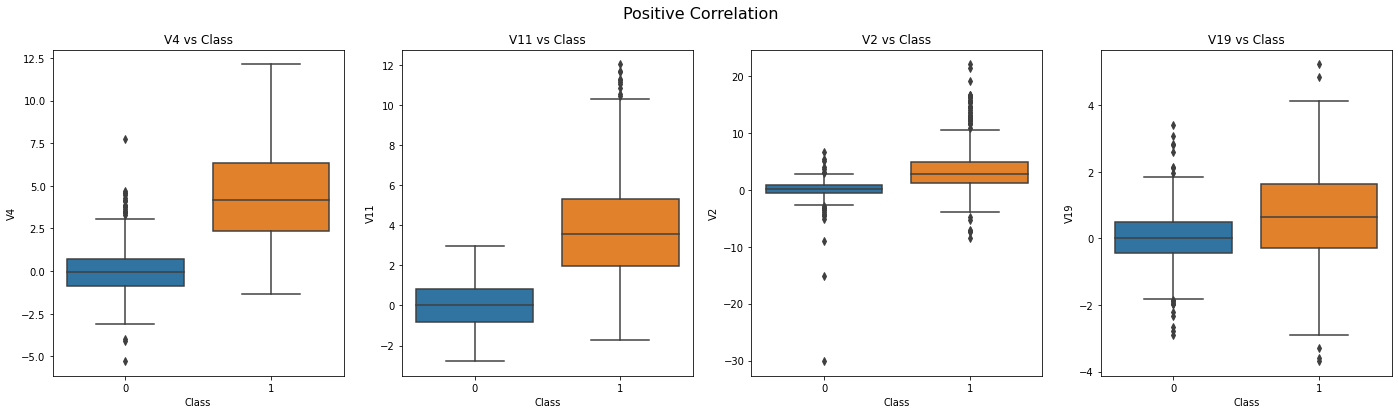

In [50]:
f, axes = plt.subplots(ncols = 4, figsize=(24, 6))

f.suptitle('Positive Correlation', fontsize=16)

sns.boxplot(x='Class', y='V4', data=distributed_dataset, ax=axes[0])
axes[0].set_title('V4 vs Class')

sns.boxplot(x='Class', y='V11', data=distributed_dataset, ax=axes[1])
axes[1].set_title('V11 vs Class')

sns.boxplot(x='Class', y='V2', data=distributed_dataset, ax=axes[2])
axes[2].set_title('V2 vs Class')

sns.boxplot(x='Class', y='V19', data=distributed_dataset, ax=axes[3])
axes[3].set_title('V19 vs Class')

In [51]:
def calculate_cutoff(data):
    q75, q25 = np.percentile(data, 75), np.percentile(data, 25)
    iqr = q75 - q25
    
    cutoff = iqr * 1.5
    
    lower_range = q25 - cutoff
    higer_range = q75 + cutoff
    
    return lower_range, higer_range

In [55]:
v14_data = distributed_dataset['V14'].loc[distributed_dataset['Class'] == 1].values
v14_lower, v14_higher = calculate_cutoff(v14_data)
distributed_dataset = distributed_dataset.drop(distributed_dataset[(distributed_dataset['V14'] > v14_higher) | (distributed_dataset['V14'] < v14_lower)].index)

v12_data = distributed_dataset['V12'].loc[distributed_dataset['Class'] == 1].values
v12_lower, v12_higher = calculate_cutoff(v12_data)
distributed_dataset = distributed_dataset.drop(distributed_dataset[(distributed_dataset['V12'] > v12_higher) | (distributed_dataset['V12'] < v12_lower)].index)

v16_data = distributed_dataset['V16'].loc[distributed_dataset['Class'] == 1].values
v16_lower, v16_higher = calculate_cutoff(v16_data)
distributed_dataset = distributed_dataset.drop(distributed_dataset[(distributed_dataset['V16'] > v16_higher) | (distributed_dataset['V16'] < v16_lower)].index)

v10_data = distributed_dataset['V10'].loc[distributed_dataset['Class'] == 1].values
v10_lower, v10_higher = calculate_cutoff(v10_data)
distributed_dataset = distributed_dataset.drop(distributed_dataset[(distributed_dataset['V10'] > v10_higher) | (distributed_dataset['V10'] < v10_lower)].index)


943

Text(0.5, 1.0, 'V16 vs Class')

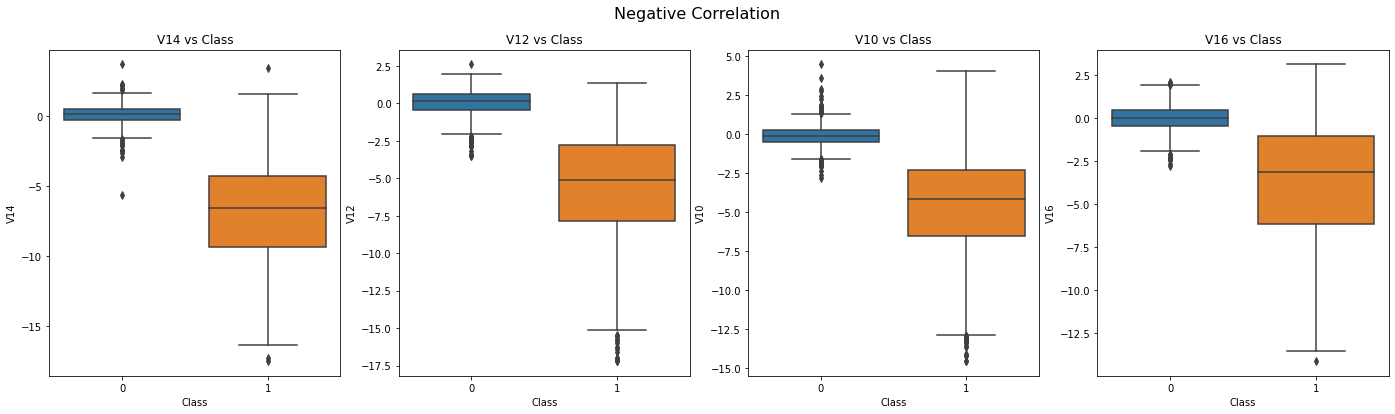

In [56]:
f, axes = plt.subplots(ncols = 4, figsize=(24, 6))

f.suptitle('Negative Correlation', fontsize=16)

sns.boxplot(x='Class', y='V14', data=distributed_dataset, ax=axes[0])
axes[0].set_title('V14 vs Class')

sns.boxplot(x='Class', y='V12', data=distributed_dataset, ax=axes[1])
axes[1].set_title('V12 vs Class')

sns.boxplot(x='Class', y='V10', data=distributed_dataset, ax=axes[2])
axes[2].set_title('V10 vs Class')

sns.boxplot(x='Class', y='V16', data=distributed_dataset, ax=axes[3])
axes[3].set_title('V16 vs Class')

In [57]:
X = distributed_dataset.drop('Class', axis = 1)
y = distributed_dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

In [61]:
classifiers = {
    'Logistic Regression' : LogisticRegression(),
    'KNearest' : KNeighborsClassifier(),
    'Decision Tree' : DecisionTreeClassifier()
}

In [64]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f"Classifier : {classifier.__class__.__name__}, has training accuracy score of {round(training_score.mean(), 2) * 100}%")

Classifier : LogisticRegression, has training accuracy score of 94.0%
Classifier : KNeighborsClassifier, has training accuracy score of 94.0%
Classifier : DecisionTreeClassifier, has training accuracy score of 89.0%


In [65]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
prediction_log_reg = log_reg_model.predict(X_test)

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
prediction_knn = knn_classifier.predict(X_test)

In [66]:
print(f'Logistic Regression : {roc_auc_score(y_test, prediction_log_reg)}')
print(f'KMeans Classifier : {roc_auc_score(y_test, prediction_knn)}')

Logistic Regression : 0.9382132132132133
KMeans Classifier : 0.9246996996996996


In [67]:
train_pred_logreg = log_reg_model.predict(X_train)
train_pred_knn = knn_classifier.predict(X_train)

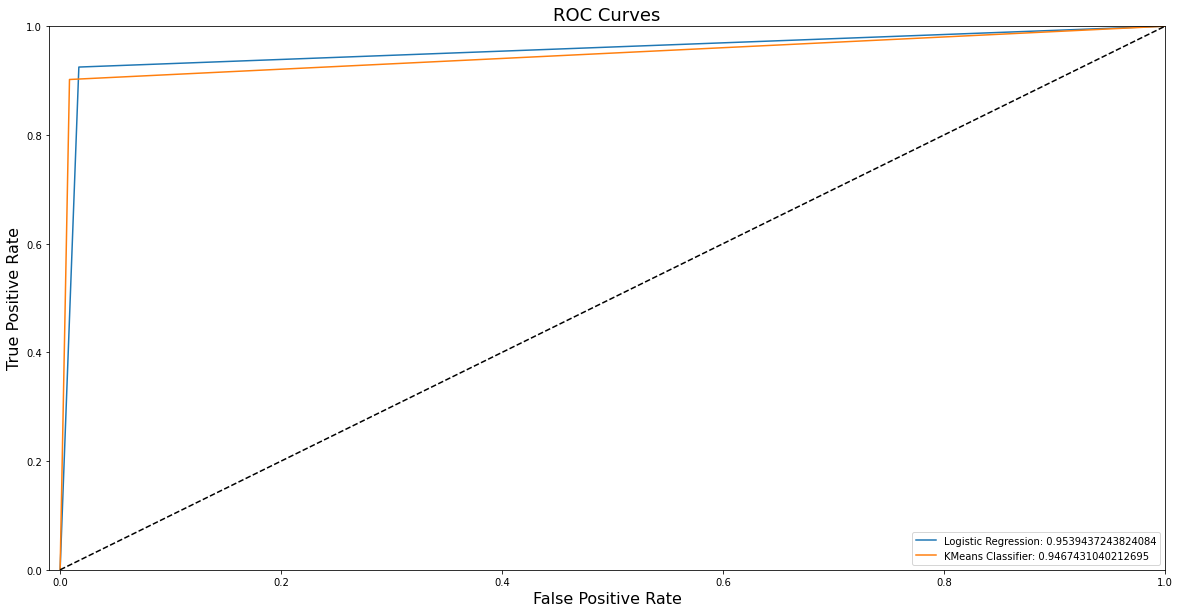

In [69]:
log_fpr, log_tpr, log_threshold = roc_curve(y_train, train_pred_logreg)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_train, train_pred_knn)

plt.figure(figsize=(20, 10))
plt.title('ROC Curves', fontsize=18)
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression: {roc_auc_score(y_train, train_pred_logreg)}')
plt.plot(knn_fpr, knn_tpr, label=f'KMeans Classifier: {roc_auc_score(y_train, train_pred_knn)}')
plt.plot([0,1], [0,1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()

In [75]:
print('---' * 42)
print(f'PRECISION SCORE : {precision_score(y_train, train_pred_logreg)}')
print(f'RECALL SCORE : {recall_score(y_train, train_pred_logreg)}')
print(f'F1 SCORE : {f1_score(y_train, train_pred_logreg)}')
print(f'ACCURACY SCORE : {accuracy_score(y_train, train_pred_logreg)}')

------------------------------------------------------------------------------------------------------------------------------
PRECISION SCORE : 0.9792387543252595
RECALL SCORE : 0.9248366013071896
F1 SCORE : 0.9512605042016807
ACCURACY SCORE : 0.956060606060606


[Text(0, 0.5, 'No Fraud'), Text(0, 1.5, 'Fraud')]

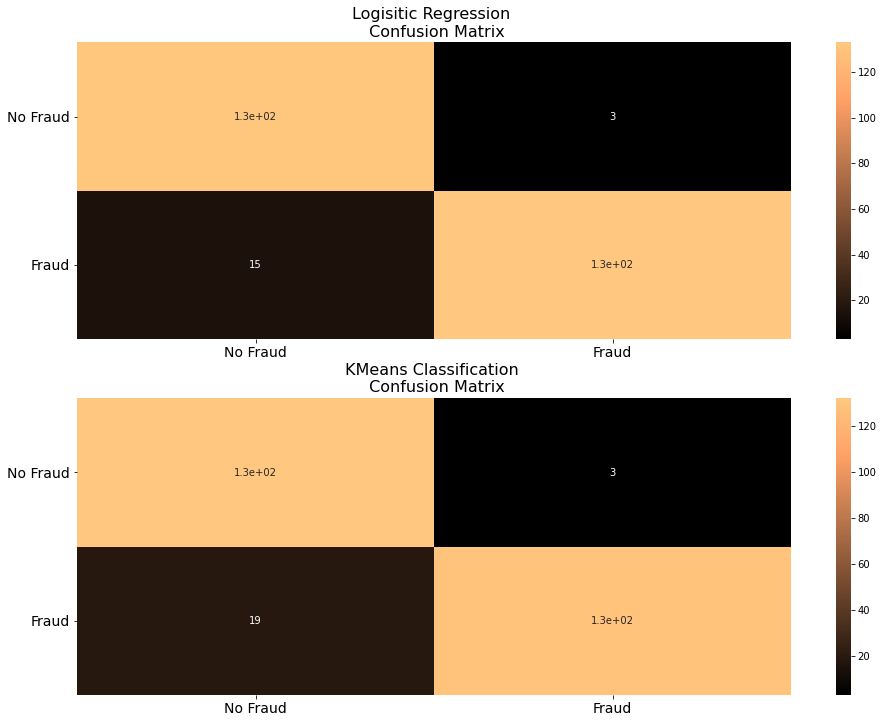

In [83]:
cf_logreg = confusion_matrix(y_test, prediction_log_reg)
cf_knn = confusion_matrix(y_test, prediction_knn)

fig, ax = plt.subplots(2, 1, figsize=(16, 12))

sns.heatmap(cf_logreg, ax = ax[0], annot=True, cmap=plt.cm.copper)
ax[0].set_title('Logisitic Regression \n Confusion Matrix', fontsize=16)
ax[0].set_xticklabels(['No Fraud', 'Fraud'], fontsize=14, rotation=360)
ax[0].set_yticklabels(['No Fraud', 'Fraud'], fontsize=14, rotation=360)

sns.heatmap(cf_knn, ax = ax[1], annot=True, cmap=plt.cm.copper)
ax[1].set_title('KMeans Classification \n Confusion Matrix', fontsize=16)
ax[1].set_xticklabels(['No Fraud', 'Fraud'], fontsize=14, rotation=360)
ax[1].set_yticklabels(['No Fraud', 'Fraud'], fontsize=14, rotation=360)

In [82]:
print('Logistic Regression:')
print(classification_report(y_test, prediction_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, prediction_knn))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       135
           1       0.98      0.90      0.94       148

    accuracy                           0.94       283
   macro avg       0.94      0.94      0.94       283
weighted avg       0.94      0.94      0.94       283

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       135
           1       0.98      0.87      0.92       148

    accuracy                           0.92       283
   macro avg       0.93      0.92      0.92       283
weighted avg       0.93      0.92      0.92       283

